#import dependencies
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [232]:
#load the Boston Housing Data Dataset from sklearn.datasets and print it 
from sklearn.datasets import load_boston
boston_house = load_boston()
print(boston_house)


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [233]:
#transform dataset into dataframe
boston = load_boston()
boston_X = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_X['PRICE'] = boston.target
print(boston_X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [234]:
#Stats of variable
boston_X.describe(include="all")


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [235]:
# Define mean and std of a variable (NOX)
print(boston_X['NOX'].mean())
print(boston_X['NOX'].std())

0.5546950592885372
0.11587767566755611


Text(0.5, 1.0, 'NOX')

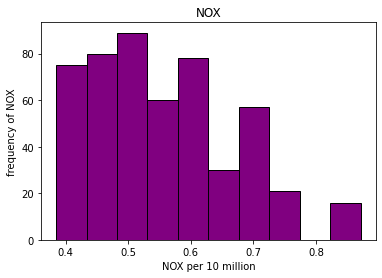

In [ ]:
#Histogram of variable
%matplotlib inline
plt.hist(boston_X['NOX'], color='purple', edgecolor='black')
plt.xlabel('NOX per 10 million')
plt.ylabel('frequency of NOX')
plt.title('NOX')

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <BarContainer object of 10 artists>)

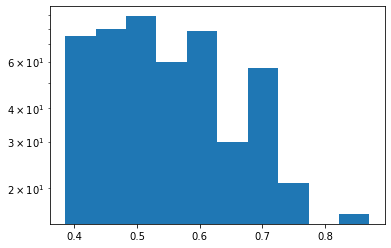

In [260]:
plt.hist(boston_X['NOX'], log=True)

In [253]:
#sample correlaion between the NOX and median home prices
boston_X['NOX'].corr(boston_X['PRICE'])


-0.4273207723732826

Text(0.5, 1.0, 'PRICE VS NOX')

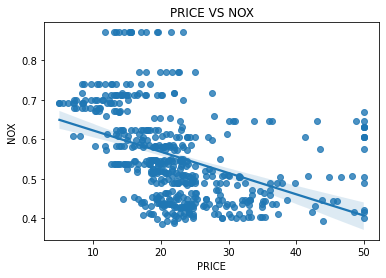

In [238]:
# preform prediction regression on variable and MEDV
sns.regplot( x= 'PRICE' , y= 'NOX', data=boston_X, fit_reg= True)
plt.title('PRICE VS NOX')
#NEGATIVE LINEAR REGRESSION LINE(INDEPENDENT VARIABLE INCREASES, DEPENDENT VARIABLE DECREASES)

In [239]:
#PART TWO:
#You have a theory that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target) than those that do not.

In [240]:
#Null (Testing Theory)
#Tracts that border the CHAS will not have a higher MEDV price than those that do not.
# Average of outer land
chas_outer_average= boston_X.loc[boston_X['CHAS'] ==0, 'PRICE'].mean()
print(chas_outer_average)


22.093842887473482


In [241]:
#STDV of outer land
chas_outer_stdv= boston_X.loc[boston_X['CHAS'] ==0, 'PRICE'].std()
print(chas_border_stdv)

8.831362409577903


In [242]:
#AVG of bordered land
chas_bordered_avg= boston_X.loc[boston_X['CHAS'] ==1, 'PRICE'].mean()
print(chas_bordered_avg)


28.44


In [243]:
#STDV of bordered land
chas_bordered_stdv= boston_X.loc[boston_X['CHAS'] ==1, 'PRICE'].std()
print(chas_bordered_stdv)


11.816643297634458


In [244]:
#TARGET MEAN and STDV 
pricing_mean= (boston_X['PRICE'].mean())
print(pricing_mean)
pricing_stdv= (boston_X['PRICE'].std())
print(pricing_stdv)

22.532806324110698
9.19710408737982


In [245]:
#test significance
import scipy
scipy.stats.levene(boston_X['PRICE'], boston_X['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

In [246]:
scipy.stats.ttest_ind(boston_X['PRICE'], boston_X['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [247]:
# Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis 

In [248]:
#90% Confidence interval
ci_interval=st.t.interval(alpha=0.90, df=len(boston_X.loc[boston_X['CHAS'] == 1, 'PRICE'])-1, loc=boston_X.loc[boston_X['CHAS'] ==1, 'PRICE'].mean())
print(ci_interval)

(26.749075740664274, 30.130924250770654)


In [250]:
# parameters for the analysis 
effect_size = 0.6
alpha = 0.05
# significance level
power = 0.8
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 44.59
